# Data Madness - Group 44
## The Formula behind Formula One: Driven by Data
### Student Name - Student ID
Nicolas Thiel - i6254307
<br>
Matthew Foster - i6250358
<br>
Johann Lottermoser - 

[Here](https://www.youtube.com/watch?v=FsruchsvQWE) is the link to our video for Data Madness, it is on YouTube!

# Imports

In [1]:
import pandas as pd
import numpy as np
import statistics
import datetime
import requests
import zipfile
import io
import os

from matplotlib import pyplot as plt
import seaborn as sns

# Connecting to ErgastAPI to download the latest F1 data

In [2]:
# Define the URL for the zip file and the local filename to use
url = 'http://ergast.com/downloads/f1db_csv.zip'
filename = 'f1db_csv.zip'

# Create a data directory if it doesn't exist
if not os.path.exists('../data'):
    os.makedirs('../data')

# Download the zip file
response = requests.get(url)

# Unzip the file into the data directory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
    zip_file.extractall('../data')

dataframes = {}

# Loop through the csv files in the data directory
for csv_file in os.listdir('../data'):
    if csv_file.endswith('.csv'):
        # Read the csv file into a dataframe 
        df_name = csv_file.replace('.csv', '')
        dataframes[df_name] = pd.read_csv(f'../data/{csv_file}')

# Creating Dataframes for the CSV files we wish to work with.

In [ ]:
# races
races = dataframes['races']
print(races.shape)
races.head()

(1102, 18)


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
# drivers
drivers = dataframes['drivers']
print(drivers.shape)
drivers.head()

(857, 9)


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
# lap times
lap_times = dataframes['lap_times']
print(lap_times.shape)
lap_times.head()

(540118, 6)


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [ ]:
# results
results = dataframes['results']
print(results.shape)
results.head()

(25880, 18)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
# constructors
constructors = dataframes['constructors']
print(constructors.shape)
constructors.head()

(211, 5)


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
# circuits
circuits = dataframes['circuits']
print(circuits.shape)
circuits.head()

In [ ]:
# status
status = dataframes['status']
print(status.shape)
status.head()

## Question 2
### At which tracks does starting position have a higher impact on the final position?

In Formula 1 there are a lot of different types of circuits. On the one hand there are highspeed circuits with long straights and fast corners, such as Monza, Italy or Spa Francorchamps, Belgium. On the other hand there a twisty street circuits like Monte-Carlo, Monaco. Furthermore, there are circuits that feature a layout that makes it generally hard to overtake the car in front (for various reasons).

We hypothesise that the starting positon (also called 'grid positon' or 'grid') effects the finishing position the most on street circuits and circuits with a layout that does not support easy overtakes.

### Merging

In [ ]:
# merge results and race to obtain circuitId and date
results_copy_q2 = results[['resultId', 'raceId', 'grid', 'positionOrder', 'positionText', 'statusId']].merge(
    races[['raceId', 'circuitId', 'date']],
    on='raceId'
)

# converting datatypes
results_copy_q2['grid'] = pd.to_numeric(results_copy_q2['grid'], errors='coerce')
results_copy_q2['positionOrder'] = pd.to_numeric(results_copy_q2['positionOrder'], errors='coerce')
results_copy_q2['date'] = pd.to_datetime(results_copy_q2['date'])

### Selecting

The selected data
- only cotains results from 2000 onwards, due to changing car concepts and general evolution of the car that made it easier / harder to overtake on certain tracks.
- does not contain drivers that start from the pit lane (e.g. due to a penalty), since the pit lane is not an offical grid position
- only contains results of drivers that started and finished within the top 10. Thats our way of keeping the influence of retiring cars as small as possible.

In [ ]:
# only care about races after 2000
results_copy_q2 = results_copy_q2[results_copy_q2['date'] > datetime.datetime(2000, 1, 1)]

# remove pit lane starters
results_copy_q2 = results_copy_q2[results_copy_q2['grid'] != 0]

# only take cars into account that started and finished within the top 10
results_copy_q2 = results_copy_q2[results_copy_q2['grid'] <= 10]
results_copy_q2 = results_copy_q2[results_copy_q2['positionOrder'] <= 10]

# display dataframe
print(results_copy_q2.shape)
results_copy_q2.head()

(3170, 8)


,resultId,raceId,grid,positionOrder,positionText,statusId,circuitId,date
0,1,18,1,1,1,1,1,2008-03-16
1,2,18,5,2,2,1,1,2008-03-16
2,3,18,7,3,3,1,1,2008-03-16
4,5,18,3,5,5,1,1,2008-03-16
8,9,18,2,9,R,4,1,2008-03-16


### Find out for which circuit the starting position matters most

In [ ]:
# find out number of races for all circuits
race_per_circuit = results_copy_q2.groupby('circuitId').agg(
    num_races = ('raceId', 'nunique')
).reset_index()

# display dataframe
print(race_per_circuit.shape)
race_per_circuit.head()

(37, 2)


,circuitId,num_races
0,1,21
1,2,18
2,3,20
3,4,23
4,5,9


In [ ]:
# for all circuit-grid combinations, find the average finishing position
circuit_grid_grouped = results_copy_q2.groupby(['circuitId', 'grid']).agg(
    positionOrder = ('positionOrder', 'mean')
).reset_index()

# and calculate the difference
circuit_grid_grouped['delta'] = circuit_grid_grouped['grid'] - circuit_grid_grouped['positionOrder']

# display dataframe
print(circuit_grid_grouped.shape)
circuit_grid_grouped.head()

(357, 4)


,circuitId,grid,positionOrder,delta
0,1,1,2.176471,-1.176471
1,1,2,3.470588,-1.470588
2,1,3,3.235294,-0.235294
3,1,4,4.187500,-0.187500
4,1,5,4.214286,0.785714


In [ ]:
# group by circuit
circuit_grouped = circuit_grid_grouped.groupby('circuitId').agg(
    mean_delta = ('delta', 'mean')
).reset_index()

# only take into account circuits with 10 or more races
circuit_grouped = circuit_grouped[race_per_circuit['num_races'] >= 10]

# merge with circuits to obtain location and country of the circuit
circuit_grouped = circuit_grouped.merge(circuits[['circuitId', 'location', 'country']], on='circuitId')

### Results

In [ ]:
# display results
circuit_grouped.sort_values(by='mean_delta')

,circuitId,mean_delta,location,country
17,24,0.266008,Abu Dhabi,UAE
12,17,0.313844,Shanghai,China
7,10,0.365390,Hockenheim,Germany
8,11,0.396813,Budapest,Hungary
2,3,0.492332,Sakhir,Bahrain
13,18,0.507398,São Paulo,Brazil
18,69,0.520833,Austin,USA
6,9,0.540136,Silverstone,UK
5,7,0.561300,Montreal,Canada
0,1,0.576015,Melbourne,Australia


When looking at the results, one can see that Abu Dhabi, Shanghai and Hockenheim are the circuits where, on average, the finishing position differs the least from the finishing position. One could say, on those circuits, starting position has the highest impact.

As stated in the beginning, we expected street circuits like Monaco, or circuits where its generally hard to overtake to lead this list. However, both of them find themselves in the lower part of the list, therefore indicating that starting position does not matter as much as expected. We assume that this goes back to the fact that circuits like this, who are usually very demanding for the driver, both physically and mentally, feature a lot of retiring cars (due to crashes, collisions or other kind of damage) which effects the finishing position of the other cars.

## Question 3
### How does the altitude of a racing circuit affect the number of mechanical failures?

Formula 1 cars consists of lots of different components. Some of them are heat sensitive and require excessive cooling during the race achieved by making use of the airflow. <br>
In higher altitudes the air becomes less and less dense, thus reducing its cooling effect.

Therefore we hypothesise that there is a positive correlation beteen the altitude of a circuit and the number of mechanical failures held at that circuit.

### Merging

The finishing status of every driver per race is listed in *races*. However, *races* does not reference the circuit the result was scored on, thus we do not have direct access to the altitude. <br>
In order to have access to the altitude for each result, *results* and *races* are merged to obtain circuitId. Using circuitId to merge *circuits* we obtain the altitude for each record in *results*.

In [ ]:
# merge results and races to gain 'circuitId' and 'date'
results_copy_q3 = results[['resultId', 'raceId', 'statusId']].merge(races[['raceId', 'circuitId', 'date']], on='raceId')

# merge newly obtained df and circuits to gain 'location', 'country' and 'alt'
results_copy_q3 = results_copy_q3.merge(circuits[['circuitId', 'alt']], on='circuitId')
results_copy_q3['alt'] = pd.to_numeric(results_copy_q3['alt'], errors='coerce')

### Selecting

Due to the various changes in the technical regulations as well as the improvements in durability of car components, only data from year 2000 and onwards will be considered. 

In [ ]:
# only take races from 2000 onwards into account
results_copy_q3['date'] = pd.to_datetime(results_copy_q3['date'])
results_copy_q3 = results_copy_q3[results_copy_q3['date'] > datetime.datetime(2000, 1, 1)]

### Labeling

Finally, we have to define 'mechanical failure'. For this analysis we decided to label a result as a 'mechanical failure' if a driver's race ended due to on of the following causes:
- engine failure
- overheating
- radiator failure
- turbo failure
- cooling system failure

*status* features a lot more failures, however most of them are not related to car components that we suspect to be influenced by high air density and therefore are not considered.

In [ ]:
# indicate records with mechanical failures
statusIds_failures = [5, 25, 21, 101, 141] # engine, overheating, radiator, turbo, cooling system respectively
results_copy_q3['mechanical_failure'] = results_copy_q3['statusId'].isin(statusIds_failures).astype(int)

# display dataframe
print(results_copy_q3.shape)
results_copy_q3.head()

(9200, 7)


,resultId,raceId,statusId,circuitId,date,alt,mechanical_failure
0,1,18,1,1,2008-03-16,10.0,0
1,2,18,1,1,2008-03-16,10.0,0
2,3,18,1,1,2008-03-16,10.0,0
3,4,18,1,1,2008-03-16,10.0,0
4,5,18,1,1,2008-03-16,10.0,0


### Calculating mechanical failures per race for each altitude

After preparing the data, the next step is calculating the mechanical failures per race for each altitude. In order to achieve this, firstly the data needs to be grouped by altitude while keeping track of the number of races and failures at each altitude. After that the average number of failures per race is calculated.

In [ ]:
# group by altitude
failures_at_alt = results_copy_q3.groupby('alt').agg(
    num_races=('raceId', 'nunique'),
    num_failures=('mechanical_failure', 'sum')
).reset_index()

# calculate failures per race for each altitude
failures_at_alt['failures_per_race'] = failures_at_alt['num_failures'] / failures_at_alt['num_races']

# only take altitudes into account at which 5 or more races were hosted
failures_at_alt = failures_at_alt[failures_at_alt['num_races'] >= 5]

# display dataframe
print(failures_at_alt.shape)
failures_at_alt.head()

(25, 4)


,alt,num_races,num_failures,failures_per_race
0,-7.0,6,1,0.166667
2,2.0,8,0,0.000000
3,3.0,14,3,0.214286
4,4.0,5,2,0.400000
5,5.0,16,4,0.250000


### Results
In the following section the correlation between the altitude and failures per race is calulcated and a scatterplot including regression line is displayed.

In [ ]:
# calculate correlation between altitiude and failures per race
corr_alt_failures = failures_at_alt['alt'].corr(failures_at_alt['failures_per_race'])

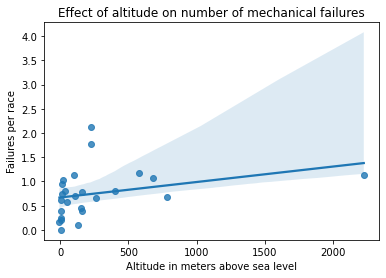

Correlation between altitude and failures per race: 0.2998


In [ ]:
# display results
sns.regplot(data=failures_at_alt, x='alt', y='failures_per_race')
plt.xlabel('Altitude in meters above sea level')
plt.ylabel('Failures per race')
plt.title('Effect of altitude on number of mechanical failures')
plt.show()
print('Correlation between altitude and failures per race:', round(corr_alt_failures, 4))

As one can see, the correlation is significantly lower than expected. 

We came to the conclusion that this likely refers to the fact that the data is heavily skewd towards lower altitudes, as a lot of race tracks are build close to the coast. Additionally, there are various different reasons for cooling sensitive parts to fail, such as high temperature, humidity or sand.

## Question 4: 
### What were the most dominant teams for each season in the 21st century, and which was the most dominant overall?

These are the general steps to get to the goal.
1. Add contructor ID column to the lap_times dataset.
2. Then, find avg time of fastest and second fastest teams for each race in each season since 2000. (21st century)
3. Compare the average gaps between first and second fastest teams in each season to determine which car was the most dominant.

In [ ]:
# Add circuit info and year to lap times dataframe, add driverRef to lap_times using driverId to merge
lap_times_with_circuit_info = lap_times.merge(races[['raceId', 'year', 'name']], on='raceId')
lap_time_circuit_drivers = lap_times_with_circuit_info.merge(drivers[['driverId', 'driverRef']], on='driverId')

# Using raceId and driverId merge with results dataframe to include constructorId (ID of the drivers team)
# Then merge with the constructors dataframe to get the team name
lap_times_circuit_drivers_teams = lap_time_circuit_drivers.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'])
lap_times_circuit_drivers_teamnames = lap_times_circuit_drivers_teams.merge(constructors[['constructorId', 'constructorRef']], on='constructorId')

# Select only the records which correspond to laps from races in the 21st century (year >= 2000)
mask_year = lap_times_circuit_drivers_teamnames['year'] >= 2000
lap_times_circuit_drivers_teamnames_post_2000 = lap_times_circuit_drivers_teamnames[mask_year]

# Grouping by race and driver, get the average laptime for each driver in each race.
avg_laptimes_by_race_and_driver = lap_times_circuit_drivers_teamnames_post_2000.groupby(['raceId', 'driverRef'], as_index=False).agg({'milliseconds': 'mean', 'driverRef': 'first', 'year': 'first', 'name': 'first', 'constructorRef': 'first', 'lap': 'last'})
# Also get the total laps run for each race, it will be used in the following step to remove drivers who did not complete the full race. (Motivation in next markdown cell).
total_laps_by_race = avg_laptimes_by_race_and_driver.groupby(['year', 'name'], as_index=False).agg({'raceId': 'first', 'year': 'first', 'name': 'first', 'lap': 'max'})

### Removing drivers who did not complete all laps.

Drivers who did not complete all the laps of the race, could have a quicker average lap time if they were retired during safety car periods on track, which increases the average lap times for those cars which managed to complete all laps. Therefore only drivers who completed all laps are considered.

In [ ]:
def check_if_completed_all_laps(row):
    raceID = row['raceId']
    total_laps = int(total_laps_by_race.loc[total_laps_by_race['raceId'] == raceID]['lap'])
    return row['lap'] >= total_laps

# Get mask for drivers who did manage to complete all laps and then use the mask to remove the drivers who did not
mask_rem_retired = avg_laptimes_by_race_and_driver.apply(check_if_completed_all_laps, axis=1)
avg_laptimes_by_race_and_driver_finished_all_laps = avg_laptimes_by_race_and_driver[mask_rem_retired]

In [ ]:
# Convert average time for drivers into average time for team by using groupby on the race and constructor.
# Then group by race and sort the laptimes and keep the two fastest teams for each race.
avg_laptimes_by_race_and_team = avg_laptimes_by_race_and_driver_finished_all_laps.groupby(['year', 'name', 'constructorRef'], as_index=False).agg({'raceId': 'first', 'milliseconds': 'mean', 'year': 'first', 'name': 'first', 'constructorRef': 'first', 'lap': 'last'})
top_2_fastest_teams_by_race = avg_laptimes_by_race_and_team.groupby(['year', 'name'], as_index=False).apply(lambda x: x.sort_values(by = 'milliseconds', ascending = True).head(2).reset_index(drop = True))

### Outlier removal

Races with a race length less than the shortest Grand Prix, which has 44 laps, were races that could not be completed, due to weather or an accident etc.
Three races also only had one team finish, which means we are unable to compare the fastest and second fastest teams, therefore these races were also removed,

In [ ]:
# Remove shortened Races
top_2_fastest_teams_by_race = top_2_fastest_teams_by_race[top_2_fastest_teams_by_race['lap'] >= 44]
# Remove races where only 1 team managed to finish as we cannot compare fastest to second fastest in these races
top_2_fastest_teams_by_race = top_2_fastest_teams_by_race.drop(top_2_fastest_teams_by_race.index[700])
top_2_fastest_teams_by_race = top_2_fastest_teams_by_race.drop(top_2_fastest_teams_by_race.index[429])
top_2_fastest_teams_by_race = top_2_fastest_teams_by_race.drop(top_2_fastest_teams_by_race.index[204])

# Calculate the percentage gap between first and second fastest teams

Separate the fastest teams into one array, and the second fastest teams into another array for comparison between lap times.

In [ ]:
# Split dataframe into the fastest teams and second fastest teams (separate arrays)
df_arr = top_2_fastest_teams_by_race.to_numpy()
row1_arr = df_arr[::2]
row2_arr = df_arr[1::2] if len(df_arr) % 2 == 0 else df_arr[1:-1:2]

gap_per_race = pd.DataFrame()
raceIDs = []
gaps = []
years = []
races = []
fastest_teams =[]
second_teams = []
for row1, row2 in zip(row1_arr, row2_arr):
    raceIDs.append(row1[0])
    gap_percent = abs((row1[1] - row2[1])/row2[1]) * 100 # Calculates the percentage gap between fastest teams average lap times and second fastest
    gaps.append(gap_percent)
    years.append(row1[2])
    races.append(row1[3])
    fastest_teams.append(row1[4]) 
    second_teams.append(row2[4])

# Add columns to new dataframe for the gaps
gap_per_race['raceID'] = raceIDs
gap_per_race['year'] = years
gap_per_race['circuit_name'] = races
gap_per_race['fastest_team'] = fastest_teams
gap_per_race['second_team'] = second_teams
gap_per_race['gap_percent'] = gaps

In [ ]:
# Now get the average gap per season (year)
avg_gap_by_season = gap_per_race.groupby(['year'], as_index=False).agg({'year': 'first', 'fastest_team': lambda x: statistics.mode(x)})
avg_gap_by_season['fastest_team'][7] = 'ferrari'
avg_gap_by_season['fastest_team'][18] = 'mercedes'

C:\Users\mattf\AppData\Local\Temp\ipykernel_7288\2571771002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_gap_by_season['fastest_team'][7] = 'ferrari'
C:\Users\mattf\AppData\Local\Temp\ipykernel_7288\2571771002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_gap_by_season['fastest_team'][18] = 'mercedes'


In [ ]:
merged_fastest = pd.merge(gap_per_race, avg_gap_by_season, on='year', how='left', suffixes=['', '_fastest'])
matching_merged = merged_fastest[merged_fastest['fastest_team'] == merged_fastest['fastest_team_fastest']]
avg_gap_per_year = matching_merged.groupby('year').agg({'year': 'first', 'fastest_team': 'first', 'gap_percent': 'mean'})

### Plotting the most dominant car from each season in the 21st century.

Using seaborn bar plot with a bar for each season, hue on the bars dependent on which team was the fastest and their respective colours from the defined colours dictionary.

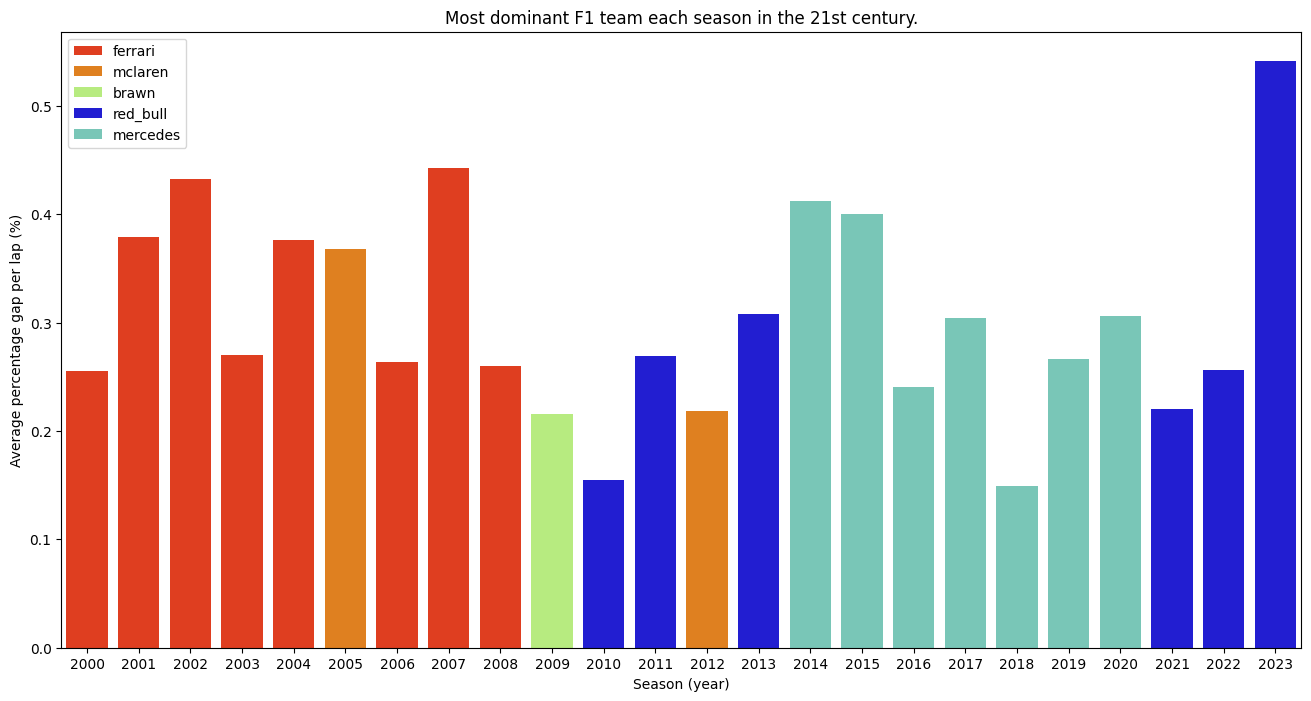

In [ ]:
colours = {
    'ferrari': '#FF2800',
    'mclaren': '#FF8000',
    'brawn': '#B8FD6E',
    'red_bull': '#0600EF',
    'mercedes': '#6CD3BF'
}

plt.figure(figsize=(16, 8))
sns.barplot(x='year', y='gap_percent', data=avg_gap_per_year, hue='fastest_team', palette=colours, width=0.8, dodge=False)

plt.xlabel('Season (year)')
plt.ylabel('Average percentage gap per lap (%)')
plt.title('Most dominant F1 team each season in the 21st century.')
plt.legend(loc='upper left')
plt.show()

## Results

It is clear that the 21st century of F1 has seen periods of dominance, Ferrari in the early years, then Mercedes and Red Bull in the previous decade or so.

We can also see that the 2023 Red Bull car is the most dominant, however this season has only had two races so far, therefore there is still plenty of time for Red Bull's average gap percentage to decrease (or increase). Ferrari from 2007 is the most dominant car which has completed the full season!

# Ethical Considerations

#### How was the data acquired?
As mentioned above we accessed the data through [Ergast's](http://ergast.com/mrd/) API.
<br>
<br>

#### Did you check the source?
We examined the data received from Ergast to ensure its correctness.
<br>
<br>

#### Are there any considerations about the analysis you made?
We believe that other than the assumptions mentioned in relevant sections, there are no considerations about our analysis of the data. We aimed to gather new insights from the data, but the results of our insights do not have ethical consequences.
<br>
<br>

#### Did you have to make decisions that affect the analysis?
Other than the assumptions discussed in the relevant section, no.
<br>
<br>

#### What are the limitations of your analysis and your conclusions?
For the status dataframe we downloaded from Ergast we believed that some of the categories for the status of a driver at the end of a race were either too wide, encompassing a wide variety of potential sub-status's. We also believe some of the status were quite similar and could've been combined, this does affect our analysis in question 3 where we consider altitude and overheating/engine failures.
<br>
<br>

#### Who are the stakeholders within your project?
The data concerns all drivers who have driven in F1 and all teams and therefore their respective personel. They are the stakeholders within our project.
<br>
<br>

#### Who can benefit from the project, who is harmed, excluded, etc?
Fans of F1, even the drivers and teams themselves could benefit from the project. 
At the same time it is also the drivers and teams who could be negatively impacted by the project if they feel the analysis is unfair, or unjust. However we have let the data drive our conclusions and not let bias cloud our judgement.